In [1]:
!pip install iapws


     |████████████████████████████████| 112kB 3.8MB/s eta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/c8/34/28/782444dd0554cee68bc6fa51d3c21563f16f2da6fc6fa6e14b
Successfully built iapws
You should consider upgrading via the 'pip install --upgrade pip' command.


Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Mar2019**

# 05. Two-Temperature Boiling Water Reactor Example
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Input Data](#data)
* [Steady state](#ss)
* [Vector ODE System](#vodes)
* [Function library](#flib)
* [One-Group Energy Neutron Balance](#nbal)
* [Reactivity Step with Negative Feedback Results](#res1)
* [Interactive Results](#ires)
---

## Objectives<a id="obj"></a>
+ Use one-group energy, two-temperature, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with time-dependent reactivity of a Boiling Water Reactor.
+ Explore and understand intrinsic temperature reactivity coefficient feedback from nuclear sources.

## Introduction<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-feedback](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Eo9JUns42F1Pqmq4tFS9sJsBv2jF8UDQvRb5l5Z2D5ssag?e=FDeSpV).

Refer to Notebook 03.


## Problem Statement<a id="ps"></a>

Consider a high temperature gas cooled reactor, with UO$_2$ fuel and a graphite moderator.
Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time for **varying** neutron reactivity, $\rho(t)$.

![](images/point-reactor-hx.png)

## Input Data<a id="data"></a>

Data pertaining to one-group energy neutron balance. 

Name                        | Parameter     | Value                | Unit             |
----------------------------|---------------|----------------------|------------------| 
neutron generation time                           | $\ell$             | $1\times 10^{-4}$    |  s | 
delayed neutron fraction                          | $\beta$            | $6.5\times 10^{-3}$  |  - |
neutron diffusion coeff.                          | $D$                | $0.84$              | cm |
core radius                                       | $R$                | $1.8\times 10^{2}$  | cm  |
core height                                       | $H$                | $2.8\times 10^{2}$  | cm  |
infinite medium neutron reproduction factor       | $k_\infty$ | 1.118 | - |
graphite effective macroscopic absorption cross section ref. | $\overline{\Sigma}_\text{a}^\text{(o)} $ | $2.74\times 10^{-4}$ |  cm$^{-1}$ |
other quantities; possibly microscopic cross sections | . | . |
. | . | . |

For thermal fission of $^{235}$U the following six-group delayed neutron precursors data is typically used (*Physics of Nuclear Kinetics*, G. R. Keepin, 1965, Addison-Wesley Pub. Co.):


Delayed neutron emitter group No. | Decay cte ($\lambda_i$,1/sec) | Relative yield ($\beta_i/\beta$) |
----------------------------------|-------------------------------|----------------------------------| 
1                                 | 0.0124                        | 0.033                            |
2                                 | 0.0305                        | 0.219                            | 
3                                 | 0.111                         | 0.196                            |  
4                                 | 0.301                         | 0.395                            | 
5                                 | 1.14                          | 0.115                            |
6                                 | 3.01                          | 0.042                            |

Data pertaining to two-temperature heat balances.

Name                        | Parameter     | Value                | Unit             |
----------------------------|---------------|----------------------|------------------| 
fission energy per fission                        | $G_\text{f}$  | 180               | MeV/fission |
$^{235}$U fuel enrichment                         | $\epsilon$ | 3 | wt% |
UO$_2$ fuel material mass density                 | $\rho_\text{fm}$ | 10.5 | g/cc |
moderator-fuel ratio (atomic number concentration) | $N^{M}/N^{U}$ | 387 |
$^{235}$U thermal microscopic fission cross section | $\sigma_{\text{f}_\text{o}}$ | 586.2 | barn |
thermal neutron temperature                       | $T^{(\text{o})}$ | 20 | C |
thermal neutron velocity                          | $v_\text{(o)}$     | 2200 | m/s |
heat transport coeff. | . | . | . |
fuel/moderator heat capacity | . | . | . |
coolant heat capacity | . | . | . |
fuel/moderator mass density | . | . | . |
coolant mass density | . | . | . |
moderator/fuel volume | . | . | . |
coolant volume | . | . | . |
coolant flow rate | . | . | . |

The residence time of the coolant in the core

\begin{equation*}
\tau = V_c / q_c
\end{equation*}


In [2]:
'''Parameters'''
import math
import iapws.iapws97 as steam
params = dict()

#Data pertaining to one-group energy neutron balance
params['gen_time']     = 1.0e-4  # s
params['beta']         = 6.5e-3  # 
#params['diff_coeff']   = 0.84 # cm
#params['core radius']  = 1.8e+2 # cm
#arams['core_height']  = 2.8e+2 # cm
params['k_infty']      = 1.34477
params['buckling'] = 1.538e-4
#params['Sigma_a']      = 2.74e-4 # 1/cm
params['q_0'] = 0

#params['alpha_tn_fake'] = 0 # -1.0e-6

params['n_dens_ss_operation'] = 1 #1.963e13/2200 * 1e4 #  #neutrons/m^2

params['alpha_n'] = -1.5e-3 # control rod reactivity worth

#Delayed neutron emission
params['species_decay']     = [0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01] # 1/sec
params['species_rel_yield'] = [0.033, 0.219, 0.196, 0.395, 0.115, 0.042] 

#Data pertaining to two-temperature heat balances
params['fis_energy']           = 180 * 1.602e-13 # J/fission 
params['enrich']               = 4.3/100.
params['fuel_mat_mass_dens']   = 10.5 # g/cc
#params['moderator_fuel_ratio'] = 387 # atomic number concentration ratio
params['sigma_f_o']            = 586.2 * 100 * 1e-30 # m2
params['temp_o']               = 20 + 273.15 # K
params['temp_c_ss_operation']  =287.2 +273.15# K desired ss operation temp of coolant
params['thermal_neutron_velo'] = 2200 # m/s

params['fis_nuclide_num_dens_fake'] = 9.84e26 # (fissile nuclei)/m3

params['q_c'] = 303 # volumetric flow rate

params['fuel_dens']   = 10500 # kg/m3
params['cp_fuel']     = 300 # J/(kg K)
params['fuel_volume'] = 15.0157429 # m3

params['steam flowrate'] = 1820 # kg/s
params['coolant_dens']   = 600 #  kg/m3
params['cp_coolant']     =  4000# J/(mol K) - > J/(kg K)
params['coolant_volume'] = 3000 # m3

params['ht_coeff'] = 723761638.7 # W/K

params['m2'] = 28.44

params['turbine efficiency'] = 0.8 
params['condenser efficiency'] = 0.8
params['pump efficiency'] = 0.8

#params['hx_dt'] = 11 + 273.15 # K  heat exchanger primary look temp difference

params['fis_prod_beta_energy_rate']  = 1.26 * 1.602e-13 # J/(fission sec) 1.26 t^-1.2 (t in seconds)
params['fis_prod_alpha_energy_rate'] = 1.40 * 1.602e-13 # J/(fission sec) 1.40 t^-1.2 (t in seconds)
# % subcooling based on the % subcooling that exists at steady state
params['% subcooling'] =  (steam._Region4(7, 0)["h"]  - steam._Region1(493.15, 7)["h"])/(steam._Region4(7,0)["h"])

params['normal steam flowrate'] = params['steam flowrate']
params['normal coolant_volume'] = params['coolant_volume']
params['breakage steam flowrate'] = 0.99999994 * params['steam flowrate']
params['breakage coolant_volume'] = 0.99999994 * params['coolant_volume']
params['breakage reached'] = False

params['shutdown temp reached'] = False




## One-Group Energy  Neutron Balance<a id="nbal"></a>

The space-invariant neutron balance for the point-reactor model is

\begin{equation*}
\frac{\text{d}n}{\text{d}t}  = \frac{\rho(t)-\beta}{\ell}\, n + \sum\limits_{i=1}^{6} \lambda_i\,c_i  + q(t),
\end{equation*}

where the first term on the right side of the equation represents the net production of neutrons not accounting for delayed neutrons, and the second term accounts for the source of delayed neutrons considering 6 groups of delayed neutron emitters resulting from the fission of $^{235}$U nuclei. Therefore a balance of neutron emitter species is also necessary

\begin{equation*}
\frac{\text{d}c_i}{\text{d}t}  = \frac{\beta_i}{\ell}\, n - \lambda_i\,c_i ,
     \ \ \ \ \ \forall \ \ \ \ \  i=1,\ldots,6.
\end{equation*}

where the first term on the right side of the equation is the source of emitters as a function of the neutron number density $n(t)$, and the second term is the consumption rate of the emitter by radioactive decay obtained as a function of the product of the number concentration of the emmiter, $c_i(t)$, multiplied by its decay constant $\lambda_i$. Here the number concentration of of the $i$th emitter, $c_i$ is considered in terms of delayed neutron number density, hence the units are the same as $n$.

The current model considers the temperature reactivity coefficient, $\alpha_{T_n}$, that is, 

\begin{equation*}
 \rho(t) = \rho_0 + \alpha_{T_n}(T_f)\,\bigl(T_f(t) - T^{(0)}\bigr),
\end{equation*}

where basic nuclear effects are taking into account through the sub-model

\begin{equation*}
 \alpha_{T_n}(T) = - \frac{B^2\,D}{2\,k_\infty\,\overline{\Sigma}_a^{(\text{o})}\,\sqrt{T^\text{(o)}\,T}}.
\end{equation*}

A heat balance in the static fuel dispersed into the moderator gives

\begin{equation*}
\frac{\text{d}T_f}{\text{d}t} = - \frac{1}{\rho_f\,c_{pf}}\biggl(q^{'''}(t) - \frac{\dot{Q}_\text{f}}{V_f} \biggr) 
\end{equation*}

where the heat rate sink in the fuel/moderator is 

\begin{equation*}
{\dot{Q}_\text{f}} = -UA\bigl(T_f-T_c\bigr), 
\end{equation*}

and the nuclear heating power is given by

\begin{equation*}
q^{'''}(t) = G_f\frac{\sqrt{\pi}}{2}\,\sigma_\text{fo}\,\sqrt{\frac{T^\text{(o)}}{T}}\,\biggl(\frac{\epsilon\,w_\text{fs}\,\rho_\text{fm}}{M_\text{fn}}\,i\,N_A\biggr)\,n(t)\,v_\text{(o)} .
\end{equation*}

A heat balance in the flowing coolant fluid produces

\begin{equation*}
\frac{\text{d}T_c}{\text{d}t} = -\frac{1}{\tau_c}\biggl(T_c-T_{in}\biggr)  
                                - \frac{1}{\rho_c\,c_{pc}}\biggl( \frac{\dot{Q}_\text{f}}{V_c} \biggr) 
\end{equation*}

where the heat rate source is the negative of the heat rate sink in the fuel/moderator.

## Steady State<a id="ss"></a>

Neutron density and delayed neutron precursor concentrations are related as follows:

\begin{align*}
n_\text{ss}  &= -\frac{q_\text{ss}\,\ell }{\rho_\text{ss} }
\\
c_{i_\text{ss}}  &= \frac{\beta_i}{\lambda_i\,\ell}\, n_\text{ss}   \ \ \ \ \forall \ \ \ \ i=1,\ldots,6 .
\end{align*}

In [3]:
'''Setup function for delayed neutron species concentrations at steady state'''

def setup_initial_conditions(params):
    
    # setup the steady state for the delayed-neutron precursors
    
    n_species = len(params['species_decay'])
    
    assert len(params['species_rel_yield']) == n_species
    
    import numpy as np
    c_vec_0 = np.zeros(n_species,dtype=np.float64) # initialize conentration vector

    species_decay = params['species_decay'] # retrieve list of decay constants
    lambda_vec    = np.array(species_decay) # create a numpy vector

    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta  # create the beta_i's vector

    gen_time = params['gen_time'] # retrieve neutron generation time

    n_ss = params['n_ss']
    c_vec_ss = beta_vec/lambda_vec/gen_time * n_ss # compute the steady state precursors number density
    
    params['c_vec_ss'] = c_vec_ss
    
    # setup initial condition for variables
    params['n_0']     = n_ss
    params['c_vec_0'] = c_vec_ss
    params['rho_0']   = params['reactivity']
    
    params['temp_f_0'] = 300
    params['temp_c_0'] = params['temp_0']
    params['pressure_0'] = 1.013 # bar
    
    return


## Vector ODE System<a id="vodes"></a>

Refer to course notes OneNote [ChEn-3170-odes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EmY427F-dSBKkpfFOx4ikf8BVAlJXL5iep1g7V7hcTQxJQ?e=98c69b).

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. Towards this goal let us define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar( \uvar, t )
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3,u_4,u_5,u_6,u_7)$ is the state vector and we assign 

\begin{align*}
 u_1(t)&=n(t),\\
 u_2(t)&=c_1(t),\\
 u_3(t)&=c_2(t),\\
 u_4(t)&=c_3(t),\\
 u_5(t)&=c_4(t),\\
 u_6(t)&=c_5(t),\\
 u_7(t)&=c_6(t),\\
 u_8(t)&=T_f(t),\\
 u_9(t)&=T_c(t).
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t), f_2(\uvar,t), f_3(\uvar,t), f_4(\uvar,t), f_5(\uvar,t), f_6(\uvar,t), f_7(\uvar,t)\bigr)$ we assign 

\begin{align*}
 f_1 & = \frac{\rho(t)-\beta}{\ell}\, u_1 + \sum\limits_{i=2}^{7} \lambda_i\,u_i + q(t), \\
 f_2 & = \frac{\beta_1}{\ell}\, u_1 - \lambda_1\,u_2, \\
 f_3 & = \frac{\beta_2}{\ell}\, u_1 - \lambda_2\,u_3, \\
 f_4 & = \frac{\beta_3}{\ell}\, u_1 - \lambda_3\,u_4, \\
 f_5 & = \frac{\beta_4}{\ell}\, u_1 - \lambda_4\,u_5, \\
 f_6 & = \frac{\beta_5}{\ell}\, u_1 - \lambda_5\,u_6, \\
 f_7 & = \frac{\beta_6}{\ell}\, u_1 - \lambda_6\,u_7,  \\
 f_8 & = - \frac{1}{\rho_f\,c_{pf}}\biggl(q^{'''}(t) - \frac{\dot{Q}_\text{f}}{V_f} \biggr), \\
 f_9 & = -\frac{1}{\tau_c}\biggl(T_c-T_{in}\biggr)  
                                - \frac{1}{\rho_c\,c_{pc}}\biggl( \frac{\dot{Q}_\text{f}}{V_c} \biggr).
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=n_0,\\
 u_2(0)&=c_{1_0},\\
 u_3(0)&=c_{2_0},\\
 u_4(0)&=c_{3_0},\\
 u_5(0)&=c_{4_0},\\
 u_6(0)&=c_{5_0},\\
 u_7(0)&=c_{6_0},\\
 u_8(0)&=T_{f_0},\\
 u_9(0)&=T_{c_0}
\end{align*}


where $n_0$ and $c_{i_0}$ are initial values for the unknowns given by the problem specification.

## Function Library <a id="flib"></a>

Functions used later in the notebook.

Reactivity coefficient based on nuclear effects through the sub-model. As this reactor uses a two-group neutron transport model (since water is both the moderator and the coolant), the derived equation is slightly different. M is the neutron transport area, which replaces L.

\begin{equation*}
\alpha_{T_n}(T) = - 2 \frac{B^2\,M^2}{k_\infty}\, 0.320886 \, (1 / T)^{0.75}
\end{equation*}

In [4]:
'''Reactivity coefficient function'''

def alpha_tn_func(temp):
    '''
    Place holder for implementation
    '''
    
    buckling = params['buckling']
    m2 = params['m2']
    k_infty = params['k_infty']
    T = temp
    
    alpha_tn = -2 * (buckling **2)  * math.sqrt(m2) * (1 / k_infty) * 0.320886 * (1 / T)**0.75
    
    
    return alpha_tn



In [5]:
'''Reactivity function'''

def rho_func( t, n_dens, temp, params ):
    '''
    Reactivity function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    temp_f: float, required
        Temperature at time t.
    params: dict, required
        Dictionary of quantities. It must have a `'rho_0'` key/value pair.
    
    Returns
    -------
    rho_t: float
        Value of reactivity.

    Examples
    --------
    '''
    
    rho_0  = params['rho_0']
    temp_ref = params['temp_c_ss_operation']
    n_dens_ss_operation = params['n_dens_ss_operation']
    alpha_n = params['alpha_n']
    
    alpha_tn = alpha_tn_func(temp)
    
    if t > params['shutdown time']:
        rho_0 = 0
    
    rho_t = rho_0 + alpha_n * n_dens + alpha_tn * (temp - temp_ref)
    
    #print(rho_t)
    #print(n_dens)
        
    return rho_t

In [6]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q = 0
    q_0 = params['q_0']
    
    if t <= 1e-5: # small time value
        q = q_0
    else:
        q = 0.0
        
    return q

#print("done")

The effective fission microscopic cross section for thermal neutrons will be taken as:

\begin{equation*}
\overline{\sigma}_\text{f}(T) = \frac{\sqrt{\pi}}{2}\,\sigma_\text{fo}\,\sqrt{\frac{T^\text{(o)}}{T}}
\end{equation*}

In [7]:
'''Effective microscopic fission cross section'''

def sigma_fis_func( temp, params ):
    '''
    Place holder for implementation
    '''
    
    sigma_f = params['sigma_f_o'] * math.sqrt(298/temp) * math.sqrt(math.pi) * 0.5
    
    return sigma_f



The nuclear heating power is given by

\begin{equation*}
q^{'''}(t) = G_f\,\overline{\sigma}_\text{f}(T)\,N_\text{fn} \,\varphi(t) .
\end{equation*}

In [8]:
'''Nuclear power density function'''

def nuclear_pwr_dens_func( time, temp, n_dens, params ):
    '''
    Place holder for implementation
    '''
    
    rxn_heat = params['fis_energy'] # get fission reaction energy J per reaction
    
    sigma_f = sigma_fis_func( temp, params ) # m2
    
    fis_nuclide_num_dens = params['fis_nuclide_num_dens_fake'] #  #/m3
    
    Sigma_fis = sigma_f * fis_nuclide_num_dens # macroscopic cross section
    
    v_o = params['thermal_neutron_velo'] # m/s
    
    neutron_flux = n_dens * 9.08E14 * v_o
    
     #reaction rate density
    rxn_rate_dens = Sigma_fis * neutron_flux
    
    # nuclear power source
    q3prime = - rxn_heat * rxn_rate_dens # exothermic reaction W/m3
    #q3prime = - n_dens * 3323E6
    #print("q3prime")
    #print(q3prime)
    
    return q3prime

The cooling heat rate is:

\begin{equation*}
{\dot{Q}_\text{f}} = -UA\bigl(T_f-T_c\bigr). 
\end{equation*}

In [9]:
'''Cooling heat rate'''

def heat_sink_rate( time, temp_f, temp_c, params):
    
    ht_coeff = params['ht_coeff']
    
    q_f = - ht_coeff * (temp_f - temp_c)
    #print(q_f)
    
    return q_f

Pressure calculations follow the ideal gas law:

\begin{equation*}
P = 0.1*\frac{nRT}{V}\
\end{equation*}

With n = 101111 moles, R = 8.314 * 10^-5 m^3 bar K^−1 mol^−1 , T as the temperature in kelvin, V as the volume of 85 m^3 and 10 being the conversion factor from bar to mPa. The calculation used returns pressure in units of mPa.

In [10]:
def pressureCalc(temperature):
    # calculates the pressure exerted by steam in the reactor at any temperature T. Returns units of mPa
    
    n = 101111 # moles
    R = 0.00008314 # m^3 bar k^-1 mol^-1
    V = 150 # m^3
    
    pressure = n * R * temperature / V # PV = NRT
    pressure = 0.1 * pressure # convert pressure in bars to pressure in to mPa
    
    #print(pressure)
    
    return pressure


In [11]:
def f_vec(time, u_vec, params):
    assert np.all(u_vec >= 0.0)
    
    n_dens = u_vec[0] # get neutron dens

    c_vec = u_vec[1:-2] # get delayed neutron emitter concentration
    
    temp_f = u_vec[-2] # get temperature of fuel
    
    temp_c = u_vec[-1] # get temperature of coolant
    
    # initialize f_vec to zero
    species_decay = params['species_decay']
    lambda_vec = np.array(species_decay)
    n_species  = len(lambda_vec)
    
    f_tmp = np.zeros(1+n_species+2,dtype=np.float64) # vector for f_vec return
    
    #----------------
    # neutron balance
    #----------------
    rho_t    = rho_func(time, n_dens, (temp_f+temp_c)/2.0, params)
    
    beta     = params['beta']
    gen_time = params['gen_time']
       
    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta
    
    assert len(lambda_vec)==len(beta_vec)
    
    q_source_t = q_source(time, params)
    
    f_tmp[0] = (rho_t - beta)/gen_time * n_dens + lambda_vec @ c_vec + q_source_t
    
    #-----------------------------------
    # n species balances (implicit loop)
    #-----------------------------------
    f_tmp[1:-2] = beta_vec/gen_time * n_dens - lambda_vec * c_vec
    
    #--------------------
    # fuel energy balance
    #--------------------
    rho_f    = params['fuel_dens']
    cp_f     = params['cp_fuel']
    vol_fuel = params['fuel_volume']
    
    pwr_dens = nuclear_pwr_dens_func( time, (temp_f+temp_c)/2, n_dens, params )
    
    heat_sink = heat_sink_rate( time, temp_f, temp_c, params )
    #assert heat_sink <= 0.0,'heat_sink = %r'%heat_sink
    
    f_tmp[-2] =  -1/rho_f/cp_f * ( pwr_dens - heat_sink/vol_fuel )
    
    #-----------------------
    # coolant energy balance
    #-----------------------
    rho_c    = params['coolant_dens']
    cp_c     = params['cp_coolant']
    vol_cool = params['coolant_volume']
    
    # subcooled liquid
    turbine_out = turbine(time, temp_c, params)[0] #run the turbine, take the runoff and pass to condenser
    condenser_out = condenser(time, turbine_out, temp_c, params)[0] #run the condenser, pass runoff to the pump
    pump_out = pump(time, condenser_out, temp_c, params) #run the pump, runoff returns to reactor as temp_in
    #print("time is ", time, "and inlet temperature is", temp_in, "\n")
    
    temp_in = pump_out
    
    tau = params['tau_fake']
    
    heat_source = - heat_sink
    
    f_tmp[-1] = - 1/tau * (temp_c - temp_in) + 1./rho_c/cp_c/vol_cool * heat_source
    
    # pressure calculations

    #print(time)
    #print(u_vec)
    return f_tmp

In [12]:
'''Create the point-reactor run function'''

def run_point_reactor( f_vec, params ):

    from scipy.integrate import odeint # Load ODE solver package

    import numpy as np
    time_final = params['time_final']
    n_time_stamps = params['n_time_stamps']
    time_stamps = np.linspace(0.0, time_final, num=n_time_stamps) # create the time stamps for solution values
    params['time_stamps'] = time_stamps
    
    max_n_steps_per_time_step = 1000 # max number of nonlinear algebraic solver iterations per time step

    n_0     = params['n_0']
    c_vec_0 = params['c_vec_0']
    
    temp_f_0 = params['temp_f_0']
    temp_c_0 = params['temp_c_0']
    pressure_0 = params['pressure_0']
       
    # m-equation point reactor model
    n_species = len(c_vec_0)
    u_vec_0 = np.zeros(1+n_species+2,dtype=np.float64)
    
    u_vec_0[0]    = n_0
    u_vec_0[1:-2] = c_vec_0
    u_vec_0[-2]   = temp_f_0
    u_vec_0[-1]   = temp_c_0
    #u_vec_0[-1]   = pressure_0
            
    (u_vec_history, info_dict) = odeint( f_vec, u_vec_0, time_stamps,
                                         args=( params, ),
                                         rtol=1e-4, atol=1e-8, mxstep=max_n_steps_per_time_step,
                                         full_output=1, tfirst=True )
    #print(n_dens)
    #print(u_vec)
    #print(time_stamps)
    #print

    assert info_dict['message']=='Integration successful.',\
                     'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

In [13]:
'''Plotting function definition'''

def plot_results( u_vec_history, normalize=True, semi_log=False, markers=False, precursors=True ):
    
    time_stamps = params['time_stamps']/3600
    tau = params['tau_fake']
        
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(14, 6))

    if precursors == True:
        
        ax2 = ax1.twinx() # duplicate x axes to plot n and c_i's in different y axes
    
        color_ids = np.linspace(0,1,u_vec_history[:,1:-2].shape[1])
    
        for (j,color_id) in zip( range(u_vec_history[:,1:-2].shape[1]), color_ids ):
            color=plt.cm.nipy_spectral(color_id)
        
            if normalize == True:
                ax2.plot( time_stamps,u_vec_history[:,j+1]/params['c_vec_0'][j],'-.',color=color,label=r'$c_%i$'%(j+1) )
                ax2.set_ylabel(r'$c_i/c_{i_0}$',fontsize=16,color='black')
            else:
                ax2.plot( time_stamps,u_vec_history[:,j+1],'-.',color=color,label=r'$c_%i$'%(j+1) )
                ax2.set_ylabel(r'$c_i$',fontsize=16,color='black')
        
        ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
        ax2.legend(loc='lower right',fontsize=12)
        if semi_log == True:
            ax2.set_yscale('log') # uncomment to plot y in log scale
        #ax2.grid(True)

    if markers == True:
        if normalize == True:
            ax1.plot( time_stamps,u_vec_history[:,0]/params['n_0'],'-',marker='+',color='red',label=r'$n/n_0$' )
            ax1.set_ylabel(r'$n$',fontsize=16,color='black')
        else:
            ax1.plot( time_stamps,u_vec_history[:,0],'-',marker='+',color='red',label=r'$n$' )
            ax1.set_ylabel(r'$n$',fontsize=16,color='black')
    else:
        if normalize == True:
            ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',color='red',label=r'$n/n_0$' )
            ax1.set_ylabel(r'$n/n_0$',fontsize=16,color='black')
        else:
            ax1.plot(time_stamps,u_vec_history[:,0],'-',color='red',label=r'$n$' )
            ax1.set_ylabel(r'$n$',fontsize=16,color='black')

    ax1.set_xlabel(r'Time [h]',fontsize=16)
    
    ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best',fontsize=12)
    if semi_log == True:
        ax1.set_yscale('log') # uncomment to plot y in log scale
    ax1.grid(True)

    plt.title(r'Point-Reactor Model: $\rho/\beta=$'
              +str(params['reactivity']/params['beta'])
              +r'; $q_0=$'+str(round(params['q_0'],2)),
              fontsize=18)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show() 

    print('')

In [14]:
'''Utility function to peak at results table'''

def peek(time,data, head=500, tail=100):  

    import pandas as pd
    
    pd.options.display.float_format = '{:.2e}'.format
    
    layout = {'time':time[:head]}
    
    layout['n'] = data[:head,0]
    
    for j in range(1,data[:,1:-2].shape[1]+1):
        layout['c_%i'%j] = data[:head,j]
        
    layout['temp_f'] = data[:head,-2]
    layout['temp_c'] = data[:head,-1]
        
    results = pd.DataFrame(layout)
    print(round(results,2))
    print('')
    
    #layout = {'time':time[-tail:]}
    
    #layout['n'] = data[-tail:,j]
    
    #for j in range(1,data[:,1:-2].shape[1]+1):
       # layout['c_%i'%j] = data[-tail:,j]
    
   # layout['temp_f'] = data[-tail:,-2]
   # layout['temp_c'] = data[-tail:,-1]
               
   # results = pd.DataFrame(layout)
   # print(round(results,2))
   # print('')

A boiling water reactor only has a single primary heating loop, as opposed to most other types of reactors which have a primary loop that cycles liquid through the reactor core and passes heat to a secondary loop to power a turbine. A boiling water reactor only has a single loop: water is boiled in the core, and then the saturated steam it produces is directly passed through a turbine, and then condensed and pumped back into the core as a subcooled liquid. The coolant_inlet_temp_func takes into account the state of the steam leaving the top of the reactor, and the specifics of the turbine and condensation processes (and in the future the pumping process as well) to determine the temperature of the subcooled liquid being returned to the bottom of the reactor.

# The Reactor
The reactor operates off a point reactor model, governed by the neutron and heat balance equations discussed above. It takes the subcooled liquid provided by the pump as input and passes steam to the turbine as output.

# The Turbine
Temperature and pressure of the coolant leaving the reactor is given by temp_c and pressure; these two variables are used with the IAPWS package (under the IAPWS-97 standards) to determine the specific enthalpy of the steam leaving the reactor. The turbine expands any steam passing through it to 0.035 kPa. This process is NOT assumed to be isentropic, and instead operates at 80% of maximum isentropic efficiency.

\begin{equation*}
W_\text{s}(isentropic) = H_\text{steam}(T_\text{c}, P_\text{c}) - H_\text{water}(100 Celcius, 1 bar)
\end{equation*}
\begin{equation*}
W_\text{s}(actual) = (0.8)(W_\text{s}(isentropic)
\end{equation*}
\begin{equation*}
W_\text{s}(actual) = H_\text{steam}(T_\text{c}, P_\text{c}) - H_\text{runoff}(T_\text{runoff}, 1 bar)
\end{equation*}

# The Condenser
The condenser takes the runoff from the turbine and turns it into a subcooled liquid. The degree to which it is subcooled varies, and is given as a % difference in the enthalpy of the subcooled liquid and the enthalpy of the saturated liquid. It the subcooled liquid runoff from the condenser is then passed to a pump which pumps the liquid to the pressure of the reactor.

# The Pump
The pump takes the subcooled liquid runoff from the condenser and pumps it back into the bottom of the reactor at the current operating pressure of the reactor.


In [15]:
class reactor:
    @staticmethod
    def pt_reactor(time, u_vec, params):
        assert np.all(u_vec >= 0.0)
    
        n_dens = u_vec[0] # get neutron dens

        c_vec = u_vec[1:-2] # get delayed neutron emitter concentration
    
        temp_f = u_vec[-2] # get temperature of fuel
    
        temp_c = u_vec[-1] # get temperature of coolant
    
        # initialize f_vec to zero
        species_decay = params['species_decay']
        lambda_vec = np.array(species_decay)
        n_species  = len(lambda_vec)
    
        f_tmp = np.zeros(1+n_species+2,dtype=np.float64) # vector for f_vec return
    
        #----------------
        # neutron balance
        #----------------
        rho_t    = rho_func(time, n_dens, (temp_f+temp_c)/2.0, params)
    
        beta     = params['beta']
        gen_time = params['gen_time']
       
        species_rel_yield = params['species_rel_yield']
        beta_vec = np.array(species_rel_yield) * beta
    
        assert len(lambda_vec)==len(beta_vec)
    
        q_source_t = q_source(time, params)
    
        f_tmp[0] = (rho_t - beta)/gen_time * n_dens + lambda_vec @ c_vec + q_source_t
    
        #-----------------------------------
        # n species balances (implicit loop)
        #-----------------------------------
        f_tmp[1:-2] = beta_vec/gen_time * n_dens - lambda_vec * c_vec
    
        #--------------------
        # fuel energy balance
        #--------------------
        rho_f    = params['fuel_dens']
        cp_f     = params['cp_fuel']
        vol_fuel = params['fuel_volume']
    
        pwr_dens = nuclear_pwr_dens_func( time, (temp_f+temp_c)/2, n_dens, params )
    
        heat_sink = heat_sink_rate( time, temp_f, temp_c, params )
        #assert heat_sink <= 0.0,'heat_sink = %r'%heat_sink
    
        f_tmp[-2] =  -1/rho_f/cp_f * ( pwr_dens - heat_sink/vol_fuel )
    
        #-----------------------
        # coolant energy balance
        #-----------------------
        rho_c    = params['coolant_dens']
        cp_c     = params['cp_coolant']
        vol_cool = params['coolant_volume']
    
        # subcooled liquid
        turbine_out = turbine1.expand(self, time, temp_c, params) #run the turbine, take the runoff and pass to condenser
        condenser_out = condenser1.compress(time, turbine_out, temp_c, params) #run the condenser, pass runoff to the pump
        pump_out = pump1.pumping(time, condenser_out, temp_c, params)#run the pump, runoff returns to reactor as temp_in
        #print("time is ", time, "and inlet temperature is", temp_in, "\n")
    
        tau = params['tau_fake']
    
        heat_source = - heat_sink
    
        f_tmp[-1] = - 1/tau * (temp_c - temp_in) + 1./rho_c/cp_c/vol_cool * heat_source
    
        # pressure calculations

        #print(time)
        #print(u_vec)
        return f_tmp
        

In [16]:
def turbine (time, temp_in, params):
    #expand the entering steam from whatever temperature and pressure it enters at to 0.035 kpa, with 80% efficiency.
    #pressure of steam when it enters the turbine equals the current reactor operating pressure
    pressure = pressureCalc(temp_in) 
        
    #print("Pressure is " + str(pressure) + " and temperature is " + str(temp_c))
        
        #enthalpy of the steam coming out of the reactor; for now, assume 100% quality or superheated steam
    h_steam = steam._Region1(temp_in, pressure)["h"] 
    h_liquid = steam._Region4(0.0035, 0)["h"]#enthalpy of the ideal liquid runoff
        
        #print(pressure, temp_in)
        
    w_isentropic = h_steam - h_liquid # isentropic work
    w_real = params['turbine efficiency'] * w_isentropic # actual work
    h_real = h_steam - w_real # h_end = h_in - w
    w_real = w_real * params['steam flowrate'] #multiply work done/kg steam by amount of steam to get total work
            
    t_runoff = steam._Backward1_T_Ph(0.00035, h_real) # this goes to the condenser
    return (t_runoff, w_real)
    

In [44]:
def condenser(time, temp_in, temp_c, params):
    #compress the liquid to 101.3 kpa and store the work done by the condenser
        
    pressure = pressureCalc(temp_c) # current reactor operating pressure that the runoff must be compressed to
    
    subcooling = params['% subcooling']
    
    #condenser functionality is partially compromised, leading to a lower degree of exit subcooling
    if time > params['malfunction start'] and time < params['malfunction end']:
        subcooling = params['malfunction subcooling']
    
    # condenser fails completely, and as a result coolant flow to and from the core is compromised
    #elif time > params['breakage start'] and time < params['breakage end']:
        #params['steam flowrate'] = params['breakage steam flowrate']
        #params['coolant_volume'] = params['breakage coolant_volume']
        #params['breakage reached'] = True
        
    #if time > params['shutdown time'] and params['shutdown temp reached'] == False:
        #params['% subcooling'] = 0.99 * params['% subcooling']
    
    # during shutdown, the degree of subcooling is gradually increased
        
   # if params['breakage reached'] == True and time > params['breakage end']:
    #    params['steam flowrate'] = params['normal steam flowrate']
    #    params['coolant_volume'] = params['normal coolant_volume']
      #  params['breakage reached'] = False
    
    h_saturated = steam._Region4(pressure, 0)["h"] # enthalpy of water at 1 atm
    h_subcooled = subcooling * h_saturated #enthalpy of the desired liquid runoff from the condenser
        
    h_turbine = steam._Region1(temp_in, 0.000035)["h"] #enthalpy of the liquid leaving the turbine at 0.035 kPa
        
    work_done = h_subcooled - h_turbine #work done by the condenser per kg steam effluent
    work_done = work_done * params['steam flowrate'] / params['condenser efficiency']
        
    t_runoff = steam._Backward1_T_Ph(pressure, h_subcooled) #runoff temperature
    
    #ensure that shutdown temp hasn't been breached
    #if t_runoff <= 310:
        #t_runoff = 310
        #params['% subcooling'] = params['% subcooling']/0.99
        #params['shutdown temp reached'] = True
    return (t_runoff, work_done)

In [18]:
def pump(time, temp_effluent, temp_c, params):
    #placeholder for a more accurate pumping function that includes a slight temperature increase and work done
    return temp_effluent
    
        
    

In [19]:
def quantities1(u_vec_history, params, time_stamps):
    # used to graph q''' and heat removed
    import pandas as pd
    data = dict()
    
    q3_list = list() #temp storage for q3 prime
    removed_heat_list = list() #manipulated q3 prime
    
    for (time, n_dens, temp_f, temp_c) in zip(time_stamps, u_vec_history[:,0], u_vec_history[:,-2], u_vec_history[:,-1]):
       
        q3prime = abs(nuclear_pwr_dens_func(time, temp_f, n_dens, params)) # calculate q3prime at this point in time; watts/m3
        q3_list.append(q3prime/1000) # convert watts/m3 to kWatts/m3
        
        heat_removed = -1 * heat_sink_rate("false", temp_f, temp_c, params) # calculate the heat removed at this point in time
        removed_heat_list.append(heat_removed/1000) # convert watts/m3 to kWatts/m3
        
    #data['time [s]'] = time_stamps
    data["q''' [kW/m3]"] =  q3_list 
    data["heat removed [kW/m3]"] = removed_heat_list
    
    quantities = pd.DataFrame( data )
    return(quantities)


In [20]:
def quantities2(u_vec_history, params, time_stamps):
    # used to graph turbine, condenser and pump work
    data = dict()
    import pandas as pd
    
    twork = list() #turbine work
    cwork = list() #condenser work
    nwork = list() #net total usable work the reactor and BOP produce
    #pwork = list() # pump work
    
    for (time, n_dens, temp_f, temp_c) in zip(time_stamps, u_vec_history[:,0], u_vec_history[:,-2], u_vec_history[:,-1]):
        
        turb = turbine(time, temp_c, params)
        twork.append(turb[1])
        
        cond = condenser(time, turb[0], temp_c, params)
        cwork.append(cond[1])
        
        net_work = turb[1] - abs(cond[1]) # Wnet = Ws - |Wcond|
        nwork.append(net_work)
        
        #pwork.append(pump_work[time])
        
    data["turbine work [kW]"] = twork
    data["condenser work [kW]"] = cwork
    data["net work [kW]"] = nwork
    
    quantities = pd.DataFrame( data )
    return(quantities)
        
    
    

In [21]:
def tmp():
    time_stamps = params['time_stamps']
    tau = params['tau_fake']
    import matplotlib.pyplot as plt    
    fig, ax1 = plt.subplots(1, figsize=(16, 6))
    ax1.plot(time_stamps/tau,u_vec_history[:,-2],'b-',label='$T_f=$ ' )

    ax1.set_xlabel(r'Time [s] ($\tau=$%4.1f s)'%tau,fontsize=16)
    ax1.set_ylabel(r'$T_f$ [K]',fontsize=16,color='blue')
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best',fontsize=12)
    ax1.grid(True)

    ax2 = ax1.twinx() 
    ax2.plot(time_stamps/tau,u_vec_history[:,-1],'g-.',label='$T_c=$ ' )
    ax2.set_ylabel(r'$T_c$ [K]',fontsize=16,color='green')
    ax2.tick_params(axis='y', labelcolor='green', labelsize=14)
    ax2.legend(loc='best',fontsize=12)
    #ax2.grid(True)

    plt.title('CSTR w/ Cooling Coil (exothermic rxn)',fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

## Reactor Startup: Reactivity Step with Pulsed Source<a id="res1"></a>

Neutronless reactor before time zero. At time zero, apply a pulsed source and a reactivity step.

In [22]:
'''Setup up initial conditions'''

import numpy as np

params['malfunction start'] = 1300
params['malfunction end'] = 0
params['breakage start'] = 1300
params['breakage end'] = 0
params['shutdown time'] = 1300

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1

params['n_ss'] = 0 # neutronless steady state before start up

rho_0_over_beta = 0.25 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

params['temp_0'] = params['temp_o']

params['tau_fake'] = 2 # s

# setup remaining initial conditions
setup_initial_conditions(params)

In [23]:
'''Evolve the point-reactor'''

time_final    = 1200# 450 # s
n_time_stamps = 500 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )
#print(u_vec_history)
print("done")

325.3548539729801
325.3548547165251
325.3548547165242
325.35485546006817
325.3548554600671
325.3550524240646
325.35505242412495
325.35505242412455
325.35486817827945
325.3548681782796
325.35485800373675
325.3548580037262
325.35486054738453
325.3548605473742
325.35486563464815
325.35486563464815
325.3548656346693
325.3548656346274
325.35486078649734
325.35486078649734
325.35486102562055
325.35486102562044
325.3548615038662
325.3548615038662
325.35486150386646
325.3548615038661
325.3548610991535
325.3548610991534
325.3548611726866
325.35486117268647
325.3548613197525
325.3548613197525
325.3548614668186
325.3548614668186
325.35486146681836
325.3548614668185
325.35486134916573
325.35486134916573
325.3548613785788
325.3548613785788
325.35486143740525
325.35486143740525
325.3548614962319
325.3548614962319
325.354861555058
325.3548621433218
325.3548621433213
325.3548627315846
325.3548627315839
325.3548686141822
325.3548686141822
325.35487449672223
325.35487449672235
325.3548803792042
325.3548

In [24]:
peek(params['time_stamps'],u_vec_history)

        time        n      c_1      c_2      c_3      c_4      c_5      c_6  \
0   0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
1   2.40e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
2   4.81e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
3   7.21e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
4   9.62e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
5   1.20e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
6   1.44e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
7   1.68e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
8   1.92e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
9   2.16e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
10  2.41e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00   
11  2.64e+01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.0

In [25]:
#plot the q3prime and heat removed data
heat_data = quantities1(u_vec_history, params, params['time_stamps'])
heat_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)


325.3548539729801
326.34257849808864
326.64534837237375
326.74105372403784
326.7712817795306
326.78081352718107
326.7838552372956
326.78478350753926
326.78501039834816
326.78506923795555
326.7850712878092
326.78506905871245
326.78507513808097
326.7850861639301
326.78509986027063
326.785111947932
326.7851233104841
326.7851180125137
326.7851128527844
326.7851004953469
326.78509201684705
326.78508748038524
326.7850859232198
326.7850870960508
326.7850874841595
326.78508592897674
326.7850866232795
326.7850875877781
326.785088599245
326.78508943847527
326.7850899782089
326.7850903778927
326.78509060849393
326.7850906653733
326.7850905731111
326.7850904388274
326.785090325056
326.78509036284123
326.7850904633983
326.7850905192987
326.78509054340896
326.78509070471125
326.7850909822428
326.78509124974346
326.7850913710467
326.78509132746194
326.7850914514936
326.7850917584313
326.7850920377683
326.785092105168
326.78509198409745
326.7850921564592
326.7850926707848
326.7850931530069
326.7850933

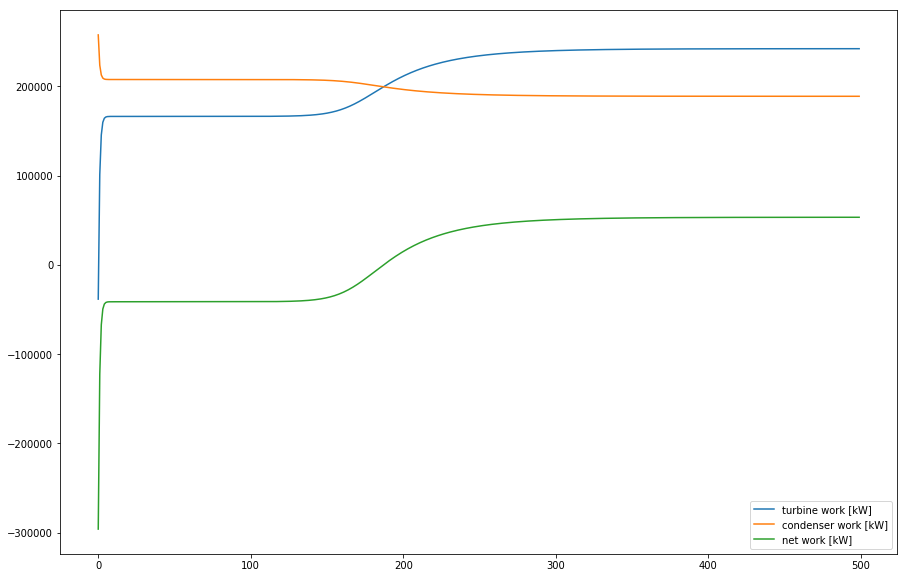

In [26]:
# plot the BOP work done
work_data = quantities2(u_vec_history, params, params['time_stamps'])
work_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

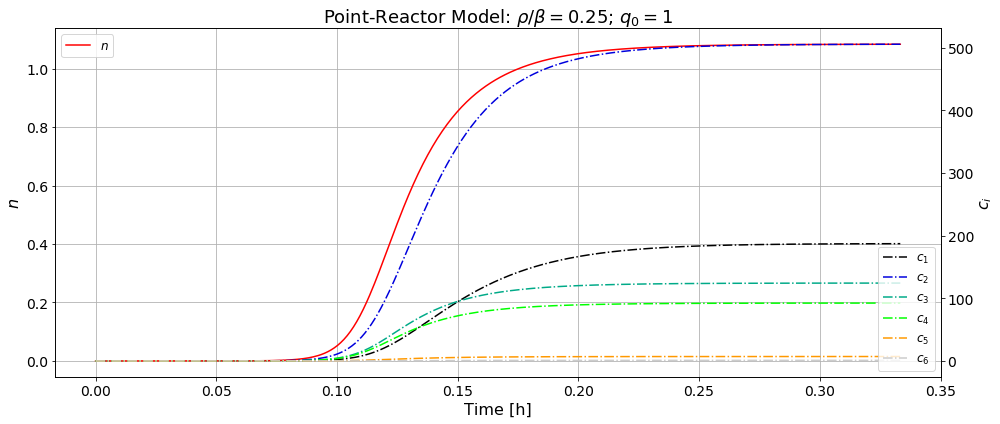

In [27]:
plot_results(u_vec_history, normalize=False)

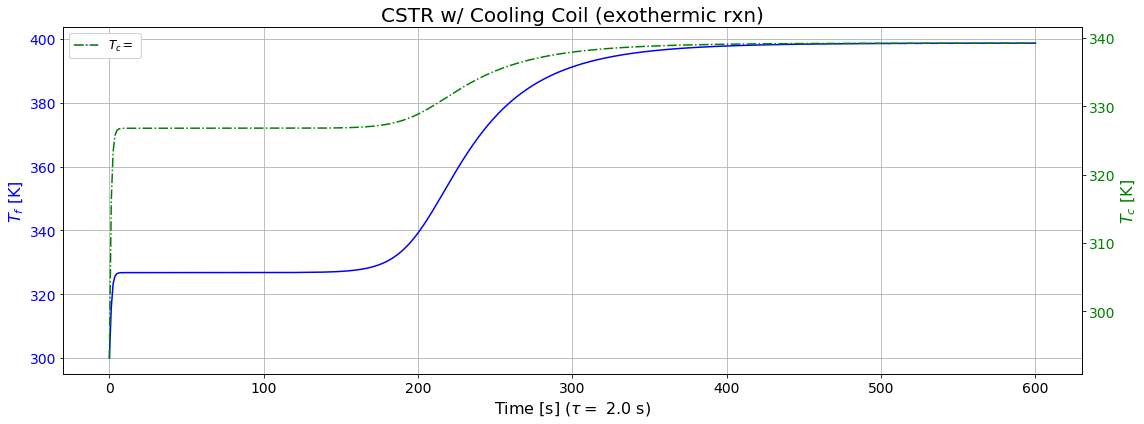

In [28]:
tmp()

# Reactor Startup and Steady State w/ condenser malfunction

In [45]:
'''Setup up initial conditions'''

import numpy as np

params['malfunction start'] = 1300 # malfunction starts at 1300 seconds and ends at 2000 seconds
params['malfunction end'] = 2000
params['breakage start'] = 3001
params['breakage end'] = 0
params['malfunction subcooling'] = 1
params['shutdown time'] = 20000

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1

params['n_ss'] = 0 # neutronless steady state before start up

rho_0_over_beta = 0.25 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

params['temp_0'] = params['temp_o']

params['tau_fake'] = 2 # s



# setup remaining initial conditions
setup_initial_conditions(params)

In [46]:
'''Evolve the point-reactor'''

time_final    = 3000# 450 # s
n_time_stamps = 1000 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )
#print(u_vec_history)
print("done")

done


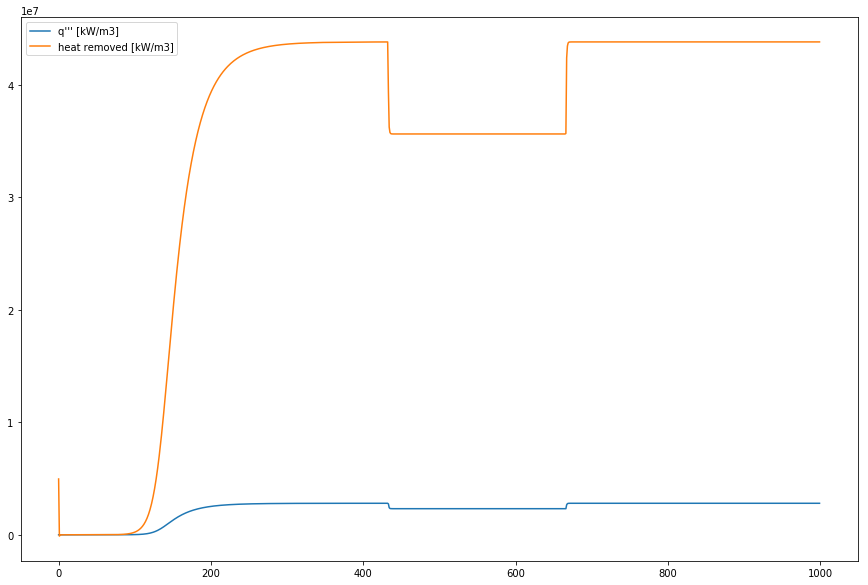

In [47]:
#plot the q3prime and heat removed data
heat_data = quantities1(u_vec_history, params, params['time_stamps'])
heat_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)


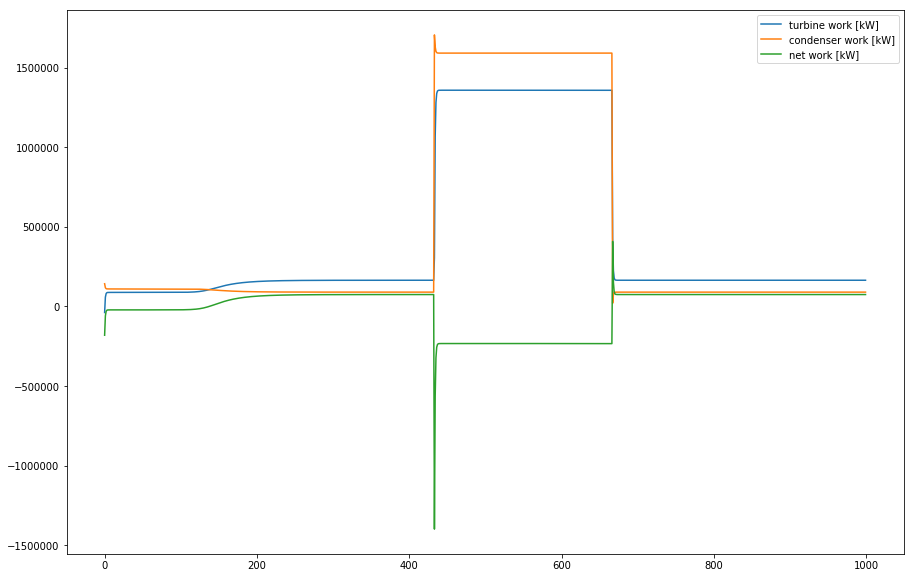

In [48]:
# plot the BOP work done
work_data = quantities2(u_vec_history, params, params['time_stamps'])
work_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

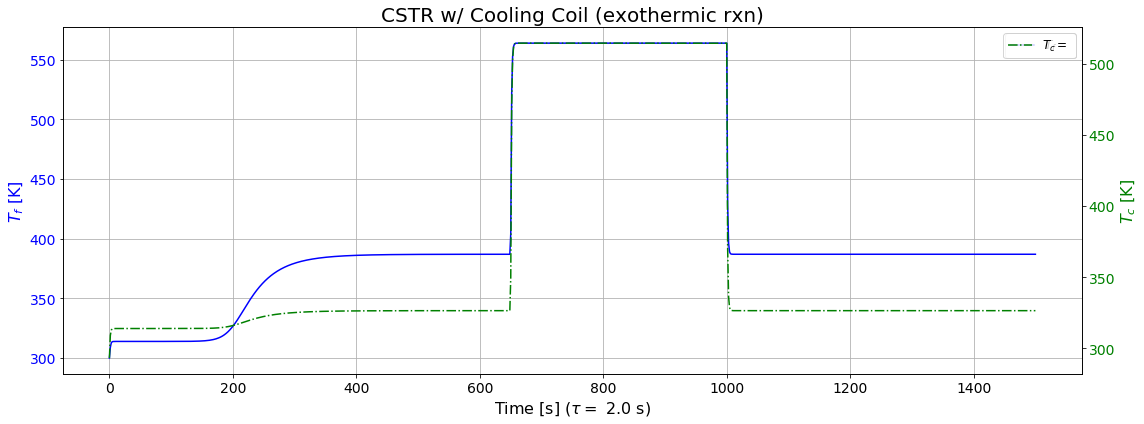

In [49]:
tmp()

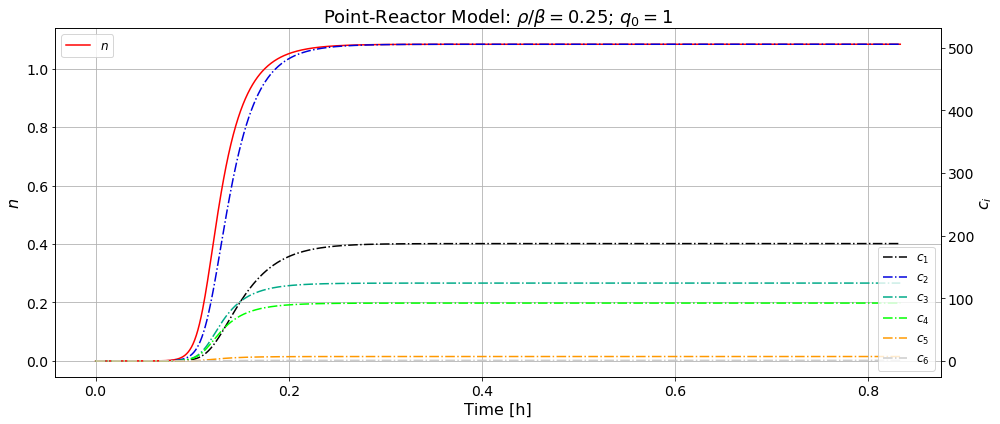

In [50]:
plot_results(u_vec_history, normalize=False)

# Complete Condenser Shutdown

In [35]:
'''Setup up initial conditions'''

import numpy as np

params['malfunction start'] = 3001 # malfunction starts at 1300 seconds and ends at 2000 seconds
params['malfunction end'] = 0
params['breakage start'] = 2000
params['breakage end'] = 2600
params['shutdown time'] = 20000

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1

params['n_ss'] = 0 # neutronless steady state before start up

rho_0_over_beta = 0.25 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

params['temp_0'] = params['temp_o']

params['tau_fake'] = 2 # s


# setup remaining initial conditions
setup_initial_conditions(params)

In [36]:
'''Evolve the point-reactor'''

time_final    = 3000# 450 # s
n_time_stamps = 1000 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )
#print(u_vec_history)
print("done")

325.3548539729801
325.3548547165251
325.3548547165242
325.35485546006817
325.3548554600671
325.35505242407635
325.3550524241367
325.3550524241364
325.35486817827996
325.3548681782801
325.3548580037367
325.3548580037262
325.3548605473849
325.35486054737447
325.35486563464855
325.35486563464855
325.3548656346696
325.35486563462763
325.35486078649757
325.35486078649757
325.3548610256206
325.3548610256207
325.3548615038667
325.3548615038667
325.35486150386674
325.35486150386635
325.3548610991536
325.3548610991534
325.3548611726867
325.3548611726867
325.35486131975244
325.35486131975244
325.35486146681865
325.35486146681865
325.35486146681865
325.35486146681865
325.3548613491659
325.354861349166
325.35486137857913
325.3548613785792
325.3548614374054
325.3548614374054
325.3548614962319
325.3548614962319
325.3548615550583
325.35486214332224
325.35486214332167
325.3548627315848
325.35486273158426
325.3548686141825
325.3548686141825
325.35487449672263
325.3548744967228
325.3548803792048
325.354

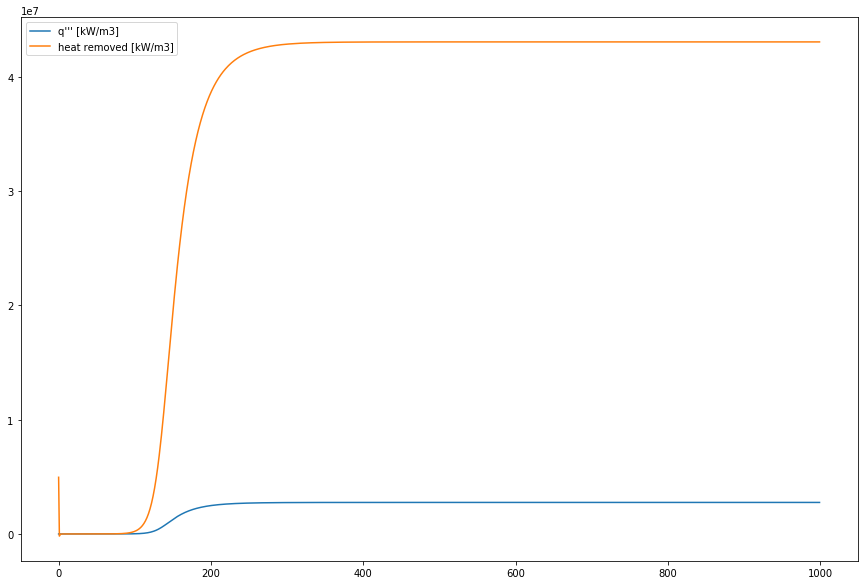

In [37]:
#plot the q3prime and heat removed data
heat_data = quantities1(u_vec_history, params, params['time_stamps'])
heat_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)


325.3548539729801
326.4530996934425
326.70654658127927
326.76648891377664
326.78078786899914
326.78420135730033
326.78493251420286
326.7850624697654
326.7850711743817
326.7850718070756
326.7850797302753
326.7850972003469
326.7851116269007
326.7851206399866
326.7851170840015
326.7851033078624
326.78509212209644
326.78508665441836
326.78508684609506
326.78508750273426
326.7850859165658
326.7850868214066
326.78508808241713
326.7850892306419
326.78508996300275
326.7850904402096
326.7850906677133
326.7850906073751
326.78509044404154
326.7850903159455
326.7850904311541
326.78509050648927
326.78509053880884
326.7850907516301
326.78509112951906
326.78509135401544
326.78509132409016
326.7850914945531
326.78509192959183
326.78509210891957
326.7850919807251
326.78509222427624
326.7850929535641
326.7850932994152
326.7850931503396
326.78509360324745
326.78509479382444
326.7850953453969
326.7850950294055
326.7850952992203
326.7850964644262
326.78509807517224
326.78509976781265
326.78510082299806
326

327.2874314150176
327.2874314432266
327.2874314703747
327.28743149649216
327.2874315216097
327.2874315457571
327.2874315689645
327.28743159126236
327.28743161268113
327.2874316332501
327.2874316530004
327.2874316719618
327.28743169016485
327.2874317076395
327.2874317244158
327.2874317405245
327.2874317559954
327.2874317708592
327.28743178514543
327.2874317988843
327.28743181210695
327.28743182484266
327.28743183712226
327.28743184897553
327.28743186043266
327.2874318715243
327.2874318822804
327.28743189273115
327.2874319029066
327.2874319128375
327.28743192255354
327.28743193208527
327.28743194146284
327.2874319507162
327.2874319598759
327.287431968972
327.287431978035
327.28743198709464
327.2874319961812
327.28743200532523
327.28743201455666
327.2874320239061
327.2874320334033
327.28743203616017
327.28743203805243
327.2874320396681
327.28743204102614
327.28743204214567
327.28743204304556
327.2874320437449
327.28743204426286
327.28743204461847
327.2874320448308
327.28743204491855
327.2

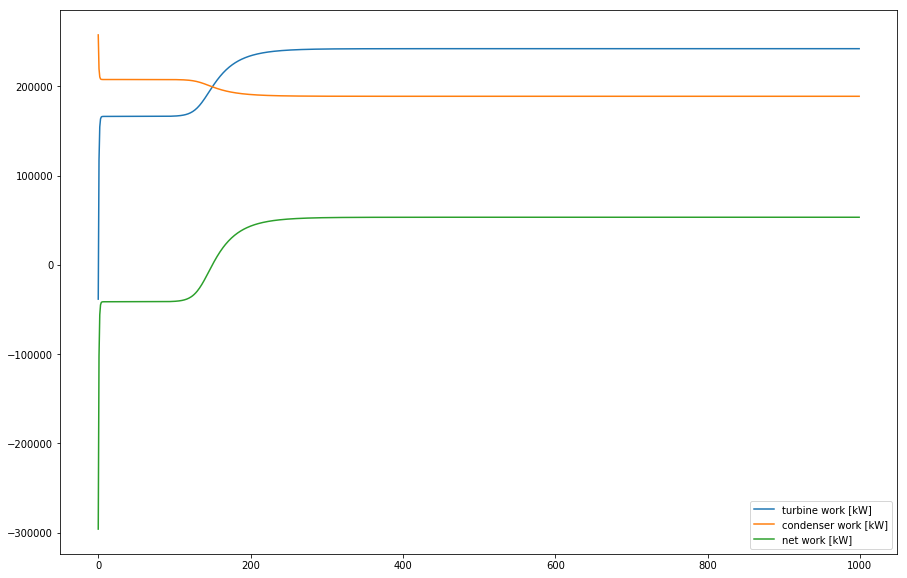

In [38]:
# plot the BOP work done
work_data = quantities2(u_vec_history, params, params['time_stamps'])
work_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

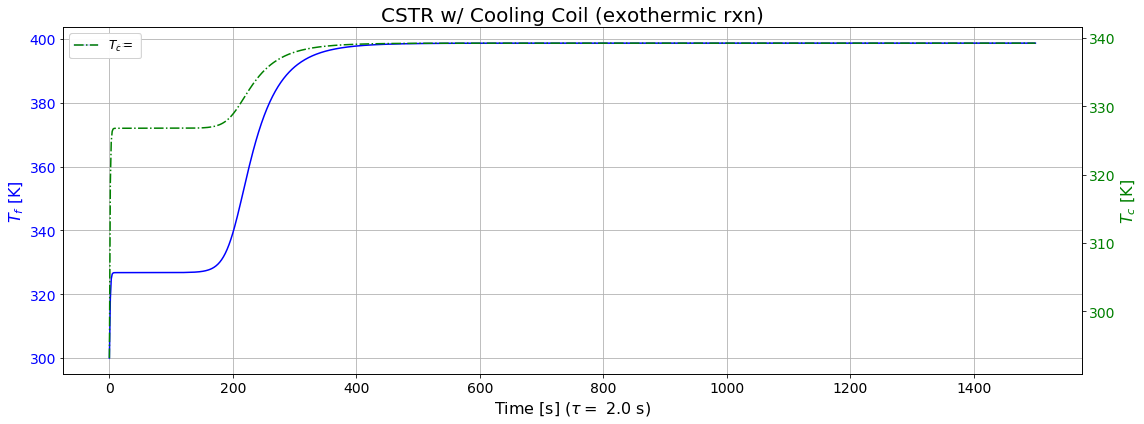

In [39]:
tmp()

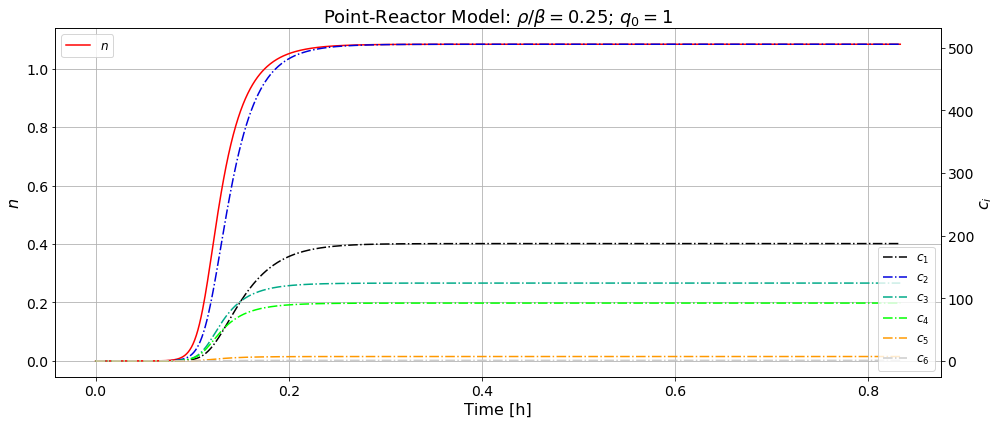

In [40]:
plot_results(u_vec_history, normalize=False)

# Shutdown

In [51]:
'''Setup up initial conditions'''

import numpy as np

params['malfunction start'] = 13000 # malfunction starts at 1300 seconds and ends at 2000 seconds
params['malfunction end'] = 0
params['breakage start'] = 13000
params['breakage end'] = 0
params['shutdown time'] = 2000

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1

params['n_ss'] = 0 # neutronless steady state before start up

rho_0_over_beta = 0.25 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

params['temp_0'] = params['temp_o']

params['tau_fake'] = 2 # s


# setup remaining initial conditions
setup_initial_conditions(params)

In [52]:
'''Evolve the point-reactor'''

time_final    = 12000 # 450 # s
n_time_stamps = 1000 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )
#print(u_vec_history)
print("done")

done


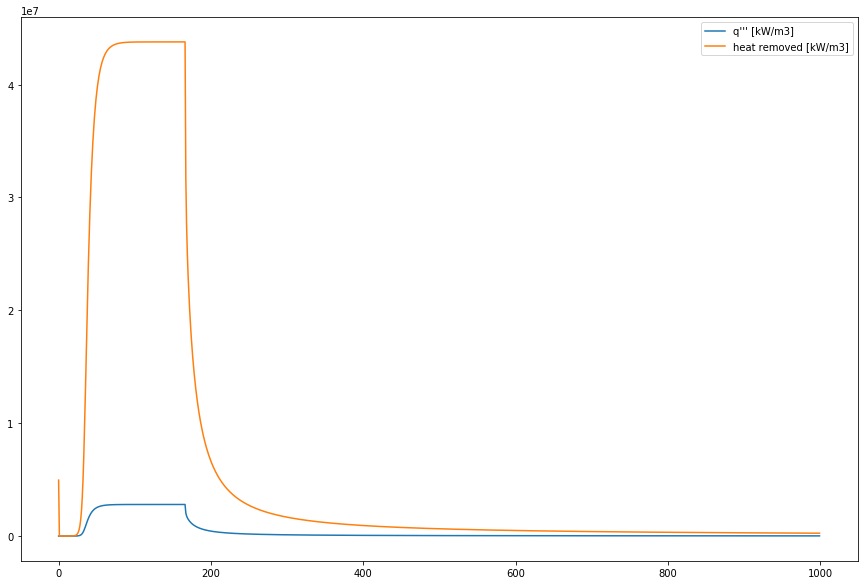

In [53]:
#plot the q3prime and heat removed data
heat_data = quantities1(u_vec_history, params, params['time_stamps'])
heat_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

In [ ]:
# plot the BOP work done
work_data = quantities2(u_vec_history, params, params['time_stamps'])
work_data.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=(15,10),
               use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, 
               xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
               yerr=None, xerr=None, secondary_y=False, sort_columns=False)

In [ ]:
tmp()

In [ ]:
plot_results(u_vec_history, normalize=False)